## ルンゲ・クッタ法による放物問題
オイラー法に比べて少ない計算量で高い精度でシミュレーションできます。ルンゲ・クッタ法については以下の記事でわかりやすく説明されています。理論班の方にはぜひ読んでいただきたいと思います。https://chemical-engineering-review.com/runge-kutta/ 

### シミュレーションの大切さ
物理屋は運動方程式を立てるのに専念すべきであり, 運動方程式を解くのはプログラムに投げるのが良いです。(普通には解けないものも多々ありますし...)

### 放物問題について
１つ目に解くのが以下の運動方程式です。
$$
\begin{align}
m\frac{d^2x}{dt^2}&=0\\
m\frac{d^2y}{dt^2}&=-mg
\end{align}
$$

最初だけはルンゲ・クッタ法を自力で実装します。普通はscipyを使うのが良いでしょう。

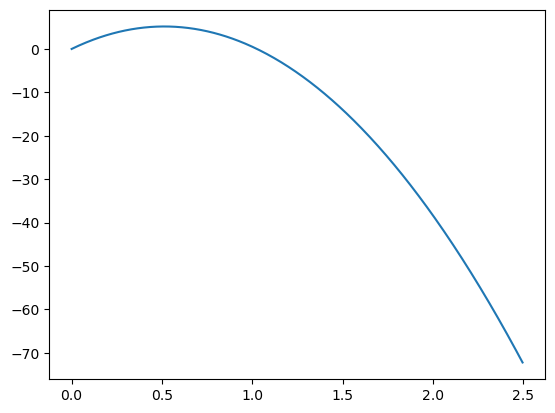

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#定数たち
T=5
n=500
h=T/n
t = np.arange(0,T,h)
m = 1
G = 9.8

#yの関数
f = lambda t,y : -G

#Runge-Kutta法
v = np.zeros(n)
y = np.zeros(n)
x = np.zeros(n)
u = np.zeros(n)
x[0] = 0
u[0] = 0.5
y[0] = 0
v[0] = 10

for i in range(n-1):
    k1 = f(t[i],v[i])
    k2 = f(t[i]+h/2,v[i]+h*k1/2)
    k3 = f(t[i]+h/2,v[i]+h*k2/2)
    k4 = f(t[i]+h,v[i]+h*k3)
    v[i+1] = v[i]+h*(k1+2*k2+2*k3+k4)/6

    l1 = v[i]
    l2 = v[i]+h*l1/2
    l3 = v[i]+h*l2/2
    l4 = v[i]+h*l3
    y[i+1] = y[i]+h*(l1+2*l2+2*l3+l4)/6

#普通に考えて...
for i in range(n):
    x[i] = i*h*u[0]


plt.plot(x,y)
plt.show()

### 空気抵抗付き
次は速さの2乗に比例した空気抵抗を受けるときの運動方程式を解いてみます。運動方程式は以下のようになります。
$$
\begin{align}
m\frac{d^2x}{dt^2}&=-mkV^2\frac{u}{V}\\
m\frac{d^2y}{dt^2}&=-mg-mkV^2\frac{v}{V}
\end{align}
$$

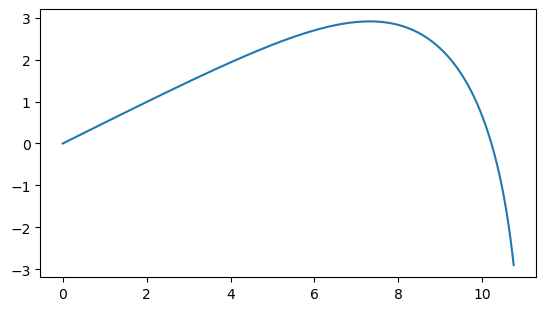

In [41]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#定数たち
T=2
m = 1
G = 9.8
k = 0.3

#解きたい方程式
def f(t,p):
    u,x,v,y = p
    dxdt=u
    dydt=v
    dudt=-k*np.sqrt(u**2+v**2)*u
    dvdt=-k*np.sqrt(u**2+v**2)*v-G
    return([dudt,dxdt,dvdt,dydt])

#初期値の設定
u_0=60
v_0=30
x_0=0
y_0=0

sol = sp.integrate.solve_ivp(f,(0,T),[u_0,x_0,v_0,y_0],dense_output=True)
t=np.arange(0,T,0.01)
x=sol.sol(t)[1]
y=sol.sol(t)[3]
plt.plot(x,y)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
